<a href="https://colab.research.google.com/github/m5532m5532/hw1_M10921008/blob/main/code/HW_1(Adult%E8%B3%87%E6%96%99%E9%9B%86).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 資料前處理

In [87]:
#Adult_data.csv
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [89]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/資料探勘作業/Adult_data.csv", header=None)
df

,0
0,"39, State-gov, 77516, Bachelors, 13, Never-mar..."
1,"50, Self-emp-not-inc, 83311, Bachelors, 13, Ma..."
2,"38, Private, 215646, HS-grad, 9, Divorced, Han..."
3,"53, Private, 234721, 11th, 7, Married-civ-spou..."
4,"28, Private, 338409, Bachelors, 13, Married-ci..."
...,...
32556,"27, Private, 257302, Assoc-acdm, 12, Married-c..."
32557,"40, Private, 154374, HS-grad, 9, Married-civ-s..."
32558,"58, Private, 151910, HS-grad, 9, Widowed, Adm-..."
32559,"22, Private, 201490, HS-grad, 9, Never-married..."


### 轉成Data Frame格式

In [90]:
df.columns

Int64Index([0], dtype='int64')

In [91]:
df.iloc[0,0].split(",")

['39',
 ' State-gov',
 ' 77516',
 ' Bachelors',
 ' 13',
 ' Never-married',
 ' Adm-clerical',
 ' Not-in-family',
 ' White',
 ' Male',
 ' 2174',
 ' 0',
 ' 40',
 ' United-States',
 ' <=50K']

In [92]:
#splitc valuesc to Dataframe
df_0 = df[0].str.split(",",expand=True)
df_0

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [93]:
df_0.columns=["age",
              "workclass",
              "fnlwgt",
              "education",
              "education_num",
              "marital_status",
              "occupation",
              "relationship",
              "race",
              "sex",
              "capital_gain",
              "capital_loss",
              "hours_per_week",
              "native_country",
              "salary"
             ]

In [94]:
#finished data frame, and then save data
df_0.to_csv("AdultsDataSet_train.csv",index=False)
df_0

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [95]:
#check data's null values
df_0.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

## 資料探索

In [97]:
df_4 =pd.read_csv("/content/drive/My Drive/Colab Notebooks/資料探勘作業/AdultsDataSet_train.csv")
df_4

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### 連續資料的資料描述

In [ ]:
df_4.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df_4.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
salary            object
dtype: object

In [ ]:
df_4['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df_4['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [ ]:
df_4['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [ ]:
df_4['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
#relationship
df_4['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [ ]:
#race
df_4['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [ ]:
#sex
df_4['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [ ]:
#native_country
df_4['native_country'].value_counts()

fliter1 = (df_4["native_country"] != ' ?')
fliter2 = (df_4["occupation"] != ' ?')
fliter3 = (df_4["workclass"] != ' ?')
df_5 = df_4[fliter1 & fliter2 & fliter3]
print(df_5['native_country'].value_counts())
print(df_5['occupation'].value_counts())
print(df_5['workclass'].value_counts())




 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Columbia                         56
 Poland                           56
 Haiti                            42
 Iran                             42
 Taiwan                           42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_6 = df_5
df_6['workclass'] = labelencoder.fit_transform(df_5['workclass'])
df_6['occupation'] = labelencoder.fit_transform(df_5['occupation'])
df_6['marital_status'] = labelencoder.fit_transform(df_5['marital_status'])
df_6['relationship'] = labelencoder.fit_transform(df_5['relationship'])
df_6['race'] = labelencoder.fit_transform(df_5['race'])
df_6['sex'] = labelencoder.fit_transform(df_5['sex'])
df_6['native_country'] = labelencoder.fit_transform(df_5['native_country'])
df_6['salary'] = labelencoder.fit_transform(df_5['salary'])
df_6

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,5,77516,Bachelors,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,Bachelors,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,HS-grad,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,11th,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,Bachelors,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,Assoc-acdm,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,HS-grad,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,HS-grad,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,HS-grad,9,4,0,3,4,1,0,0,20,38,0


In [ ]:
"""
HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
 HS_grad = df_6['education'].replace(" HS-grad",0)
df_6['education'] = HS_grad.copy()

Some_college = df_6['education'].replace(" Some-college",1)
df_6['education'] = Some_college.copy()

Bachelors = df_6['education'].replace(" Bachelors",2)
df_6['education'] = Bachelors.copy()


Masters = df_6['education'].replace(" Masters ",3)
df_6['education'] = Masters.copy()
 """


replace_values = {' HS-grad' : 0, ' Some-college' : 1, ' Bachelors' : 2, ' Masters' : 3, ' Assoc-voc' : 4, ' 11th' : 5
                 , ' Assoc-acdm' : 6, ' 10th' : 7, ' 7th-8th' : 8, ' Prof-school' : 9, ' 9th' : 10, ' 12th' : 11
                 , ' Doctorate' : 12, ' 5th-6th' : 13, ' 1st-4th' : 14, ' Preschool' : 15}                                                                                          

df_6=df_6.replace({"education": replace_values})  


print(df_6['education'].value_counts())

0     9840
1     6678
2     5044
3     1627
4     1307
5     1048
6     1008
7      820
8      557
9      542
10     455
11     377
12     375
13     288
14     151
15      45
Name: education, dtype: int64


In [ ]:
print(df_6['salary'].value_counts())

0    22654
1     7508
Name: salary, dtype: int64


In [ ]:
df_6.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
count,30162.000000,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,2.199324,1.897938e+05,2.419170,10.121312,2.580134,5.959850,1.418341,3.678602,0.675685,1092.007858,88.372489,40.931238,36.382567,0.248922
std,13.134665,0.953925,1.056530e+05,3.162317,2.549995,1.498016,4.029566,1.601338,0.834709,0.468126,7406.346497,404.298370,11.979984,6.105372,0.432396
min,17.000000,0.000000,1.376900e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176272e+05,0.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,2.000000,1.784250e+05,1.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,2.000000,2.376285e+05,3.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,6.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


In [ ]:
df_6.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [ ]:
#finished data frame, and then save data
df_6.to_csv("AdultsDataSet_Finaltrain.csv",index=False)

## Deccision tree

In [6]:
import pandas as pd


In [7]:
df_6 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/資料探勘作業/AdultsDataSet_Finaltrain.csv")

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
import pydot

In [9]:
from sklearn.externals.six import StringIO

In [10]:
X = df_6.drop('salary', axis=1)
y = df_6['salary']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [12]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3902  586]
 [ 561  984]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4488
           1       0.63      0.64      0.63      1545

    accuracy                           0.81      6033
   macro avg       0.75      0.75      0.75      6033
weighted avg       0.81      0.81      0.81      6033



In [15]:
dot_data = StringIO()

In [16]:
tree.export_graphviz(classifier,
        out_file=dot_data,
        feature_names=['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
        class_names=['<=50K',">50k"],
        filled=True, rounded=True,
        impurity=False)

In [17]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())

In [18]:
graph[0].write_pdf("/content/drive/My Drive/Colab Notebooks/資料探勘作業/adult.pdf")

[Text(234.0028222298752, 215.175, 'X[7] <= 0.5\ngini = 0.372\nsamples = 24129\nvalue = [18166, 5963]'),
 Text(153.24827130120065, 210.645, 'X[4] <= 12.5\ngini = 0.496\nsamples = 9965\nvalue = [5446, 4519]'),
 Text(99.28668891746484, 206.115, 'X[10] <= 5095.5\ngini = 0.446\nsamples = 6971\nvalue = [4629, 2342]'),
 Text(45.098327091769015, 201.585, 'X[4] <= 7.5\ngini = 0.421\nsamples = 6613\nvalue = [4622, 1991]'),
 Text(11.095648353552608, 197.055, 'X[11] <= 1791.5\ngini = 0.173\nsamples = 985\nvalue = [891, 94]'),
 Text(7.5270649322352154, 192.525, 'X[12] <= 43.5\ngini = 0.161\nsamples = 961\nvalue = [876, 85]'),
 Text(3.002356047356384, 187.995, 'X[0] <= 36.5\ngini = 0.122\nsamples = 718\nvalue = [671, 47]'),
 Text(0.5640089144180769, 183.465, 'X[1] <= 1.5\ngini = 0.029\nsamples = 207\nvalue = [204, 3]'),
 Text(0.2506706286302564, 178.935, 'X[8] <= 3.0\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.1253353143151282, 174.405, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3

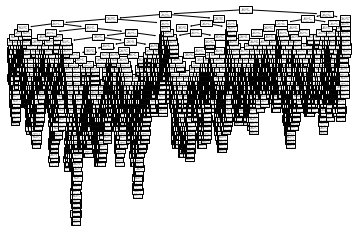

In [19]:
tree.plot_tree(classifier)

## 修正決策樹

In [28]:
df_7 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/資料探勘作業/AdultsDataSet_Finaltrain.csv")

In [29]:
df_7

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,5,77516,2,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,2,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,0,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,5,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,2,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,2,257302,6,12,2,12,5,4,0,0,0,38,38,0
30158,40,2,154374,0,9,2,6,0,4,1,0,0,40,38,1
30159,58,2,151910,0,9,6,0,4,4,0,0,0,40,38,0
30160,22,2,201490,0,9,4,0,3,4,1,0,0,20,38,0


In [30]:
df_7.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

### 以下capital_gain屬性和capital_loss屬性資料分布過於相似


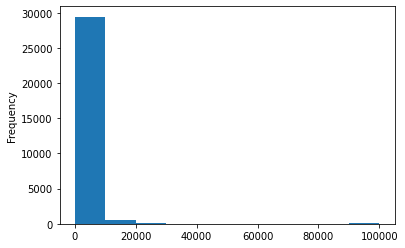

In [34]:
df_7['capital_gain'].plot.hist()

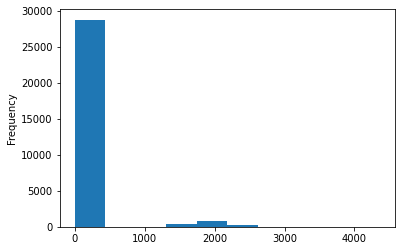

In [35]:

df_7['capital_loss'].plot.hist()

In [43]:
df_7.drop(['capital_gain', 'capital_loss'], axis=1,inplace=True)
df_8=df_7
df_8

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,salary
0,39,5,77516,2,13,4,0,1,4,1,40,38,0
1,50,4,83311,2,13,2,3,0,4,1,13,38,0
2,38,2,215646,0,9,0,5,1,4,1,40,38,0
3,53,2,234721,5,7,2,5,0,2,1,40,38,0
4,28,2,338409,2,13,2,9,5,2,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,2,257302,6,12,2,12,5,4,0,38,38,0
30158,40,2,154374,0,9,2,6,0,4,1,40,38,1
30159,58,2,151910,0,9,6,0,4,4,0,40,38,0
30160,22,2,201490,0,9,4,0,3,4,1,20,38,0


In [53]:
X = df_8.drop('salary', axis=1)
y = df_8['salary']


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [55]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [56]:
y_pred = classifier.predict(X_test)

In [57]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3887  738]
 [ 653  755]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4625
           1       0.51      0.54      0.52      1408

    accuracy                           0.77      6033
   macro avg       0.68      0.69      0.68      6033
weighted avg       0.77      0.77      0.77      6033



In [58]:
dot_data = StringIO()

In [61]:
tree.export_graphviz(classifier,
        out_file=dot_data,
        feature_names=['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex', 'hours_per_week', 'native_country'],
        class_names=['<=50K',">50k"],
        filled=True, rounded=True,
        impurity=False)

In [62]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())

In [ ]:
graph[0].write_pdf("/content/drive/My Drive/Colab Notebooks/資料探勘作業/adultv2.pdf")

[Text(234.71580813575602, 215.024, 'X[7] <= 0.5\ngini = 0.372\nsamples = 24129\nvalue = [18166, 5963]'),
 Text(154.59076745462124, 210.192, 'X[4] <= 12.5\ngini = 0.496\nsamples = 9965\nvalue = [5446, 4519]'),
 Text(100.66334141626916, 205.35999999999999, 'X[10] <= 5095.5\ngini = 0.446\nsamples = 6971\nvalue = [4629, 2342]'),
 Text(45.90354579474585, 200.528, 'X[4] <= 7.5\ngini = 0.421\nsamples = 6613\nvalue = [4622, 1991]'),
 Text(11.230122945744341, 195.696, 'X[11] <= 1791.5\ngini = 0.173\nsamples = 985\nvalue = [891, 94]'),
 Text(7.600624107637169, 190.864, 'X[12] <= 43.5\ngini = 0.161\nsamples = 961\nvalue = [876, 85]'),
 Text(3.0692723418514527, 186.032, 'X[0] <= 36.5\ngini = 0.122\nsamples = 718\nvalue = [671, 47]'),
 Text(0.6243538564643493, 181.2, 'X[8] <= 2.5\ngini = 0.029\nsamples = 207\nvalue = [204, 3]'),
 Text(0.2497415425857397, 176.368, 'X[0] <= 29.0\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.12487077129286984, 171.536, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'

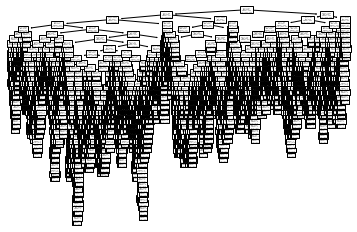

In [52]:
tree.plot_tree(classifier)

### 修剪

In [66]:
import matplotlib.pyplot as plt

In [64]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

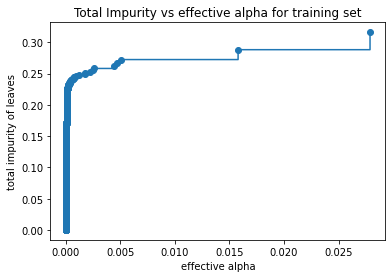

In [67]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [69]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.06170689012588121


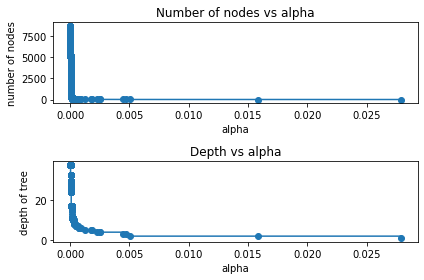

In [70]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

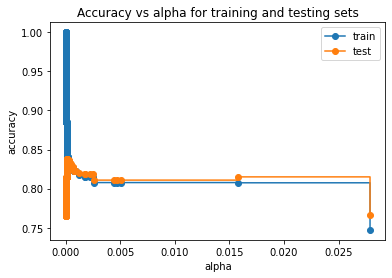

In [71]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

### 修剪後

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
import pydot

In [74]:
df_9 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/資料探勘作業/AdultsDataSet_Finaltrain.csv")
df_9.drop(['capital_gain', 'capital_loss'], axis=1,inplace=True)
df_10=df_9
df_10

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,salary
0,39,5,77516,2,13,4,0,1,4,1,40,38,0
1,50,4,83311,2,13,2,3,0,4,1,13,38,0
2,38,2,215646,0,9,0,5,1,4,1,40,38,0
3,53,2,234721,5,7,2,5,0,2,1,40,38,0
4,28,2,338409,2,13,2,9,5,2,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,2,257302,6,12,2,12,5,4,0,38,38,0
30158,40,2,154374,0,9,2,6,0,4,1,40,38,1
30159,58,2,151910,0,9,6,0,4,4,0,40,38,0
30160,22,2,201490,0,9,4,0,3,4,1,20,38,0


In [75]:
X = df_10.drop('salary', axis=1)
y = df_10['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [76]:
classifier = DecisionTreeClassifier(ccp_alpha=0.005)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.005, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [77]:
y_pred = classifier.predict(X_test)

In [84]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4347  195]
 [ 953  538]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      4542
           1       0.73      0.36      0.48      1491

    accuracy                           0.81      6033
   macro avg       0.78      0.66      0.68      6033
weighted avg       0.80      0.81      0.78      6033



In [79]:
dot_data = StringIO()

In [80]:
tree.export_graphviz(classifier,
        out_file=dot_data,
        feature_names=['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex', 'hours_per_week', 'native_country'],
        class_names=['<=50K',">50k"],
        filled=True, rounded=True,
        impurity=False)

In [81]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())

In [82]:
graph[0].write_pdf("/content/drive/My Drive/Colab Notebooks/資料探勘作業/adult3.pdf")

[Text(167.4, 181.2, 'X[7] <= 0.5\ngini = 0.374\nsamples = 24129\nvalue = [18112, 6017]'),
 Text(83.7, 108.72, 'X[4] <= 12.5\ngini = 0.496\nsamples = 10026\nvalue = [5462, 4564]'),
 Text(41.85, 36.23999999999998, 'gini = 0.446\nsamples = 7029\nvalue = [4665, 2364]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.39\nsamples = 2997\nvalue = [797, 2200]'),
 Text(251.10000000000002, 108.72, 'X[7] <= 4.5\ngini = 0.185\nsamples = 14103\nvalue = [12650, 1453]'),
 Text(209.25, 36.23999999999998, 'gini = 0.13\nsamples = 12983\nvalue = [12077, 906]'),
 Text(292.95, 36.23999999999998, 'gini = 0.5\nsamples = 1120\nvalue = [573, 547]')]

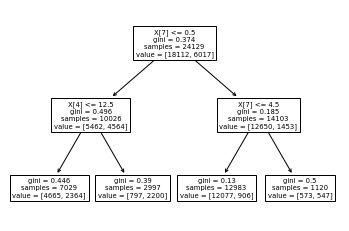

In [85]:
tree.plot_tree(classifier)